# ANN with PCA

In [1]:
import numpy as np
import pandas as pd
features_3s = pd.read_csv("D:\My Files\Documents\College Docs\Major Project\Data/features_3_sec.csv")
features_3s.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [2]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
features_3s['label'] = labelencoder.fit_transform(features_3s['label']);

In [3]:
X = features_3s.iloc[:,2:-1].values
# X
y = features_3s.iloc[:, 59].values
# y

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [5]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
# X_train
X_test = sc.transform(X_test)
# X_test

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 10)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [32]:
model = Sequential()

In [33]:
model.add(Dense(256, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [34]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [35]:
model_history_adam = model.fit(X_train, y_train, epochs=15, batch_size=100, verbose=True)

Epoch 1/15
70/70 [==============================] - 1s 3ms/step - loss: 1.7850 - accuracy: 0.3538
Epoch 2/15
70/70 [==============================] - 0s 3ms/step - loss: 1.1604 - accuracy: 0.5740
Epoch 3/15
70/70 [==============================] - 0s 3ms/step - loss: 1.0138 - accuracy: 0.6389
Epoch 4/15
70/70 [==============================] - 0s 3ms/step - loss: 0.9647 - accuracy: 0.6509
Epoch 5/15
70/70 [==============================] - 0s 3ms/step - loss: 0.8911 - accuracy: 0.6750
Epoch 6/15
70/70 [==============================] - 0s 6ms/step - loss: 0.8345 - accuracy: 0.7043
Epoch 7/15
70/70 [==============================] - 0s 6ms/step - loss: 0.8019 - accuracy: 0.7132
Epoch 8/15
70/70 [==============================] - 0s 6ms/step - loss: 0.7408 - accuracy: 0.7332
Epoch 9/15
70/70 [==============================] - 0s 6ms/step - loss: 0.7076 - accuracy: 0.7467
Epoch 10/15
70/70 [==============================] - 0s 6ms/step - loss: 0.6829 - accuracy: 0.7570
Epoch 11/15
70/70 [

In [14]:
model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [15]:
model_history_rmsprop = model.fit(X_train, y_train, epochs=15, batch_size=100, verbose=True)

Epoch 1/15
70/70 [==============================] - 1s 2ms/step - loss: 1.6630 - accuracy: 0.4180
Epoch 2/15
70/70 [==============================] - 0s 2ms/step - loss: 1.1137 - accuracy: 0.5880
Epoch 3/15
70/70 [==============================] - 0s 2ms/step - loss: 1.0296 - accuracy: 0.6281
Epoch 4/15
70/70 [==============================] - 0s 3ms/step - loss: 0.9519 - accuracy: 0.6470
Epoch 5/15
70/70 [==============================] - 0s 5ms/step - loss: 0.9139 - accuracy: 0.6730
Epoch 6/15
70/70 [==============================] - 0s 4ms/step - loss: 0.8668 - accuracy: 0.6847
Epoch 7/15
70/70 [==============================] - 0s 4ms/step - loss: 0.8236 - accuracy: 0.7059
Epoch 8/15
70/70 [==============================] - 0s 3ms/step - loss: 0.7864 - accuracy: 0.7250
Epoch 9/15
70/70 [==============================] - 0s 3ms/step - loss: 0.7578 - accuracy: 0.7334
Epoch 10/15
70/70 [==============================] - 0s 4ms/step - loss: 0.7236 - accuracy: 0.7474
Epoch 11/15
70/70 [

In [18]:
model.compile(optimizer="sgd", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [19]:
model_history_sgd = model.fit(X_train, y_train, epochs=15, batch_size=100, verbose=True)

Epoch 1/15
70/70 [==============================] - 1s 2ms/step - loss: 2.2357 - accuracy: 0.1622
Epoch 2/15
70/70 [==============================] - 0s 3ms/step - loss: 1.9181 - accuracy: 0.3555
Epoch 3/15
70/70 [==============================] - 0s 3ms/step - loss: 1.6871 - accuracy: 0.4162
Epoch 4/15
70/70 [==============================] - 0s 3ms/step - loss: 1.5618 - accuracy: 0.4477
Epoch 5/15
70/70 [==============================] - 0s 5ms/step - loss: 1.4638 - accuracy: 0.4875
Epoch 6/15
70/70 [==============================] - 0s 5ms/step - loss: 1.4016 - accuracy: 0.5053
Epoch 7/15
70/70 [==============================] - 0s 5ms/step - loss: 1.3452 - accuracy: 0.5116
Epoch 8/15
70/70 [==============================] - 0s 3ms/step - loss: 1.3019 - accuracy: 0.5263
Epoch 9/15
70/70 [==============================] - 0s 4ms/step - loss: 1.2520 - accuracy: 0.5493
Epoch 10/15
70/70 [==============================] - 0s 5ms/step - loss: 1.2369 - accuracy: 0.5532
Epoch 11/15
70/70 [

In [22]:
model.compile(optimizer="adagrad", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [23]:
model_history_adagrad = model.fit(X_train, y_train, epochs=15, batch_size=100, verbose=True)

Epoch 1/15
70/70 [==============================] - 1s 3ms/step - loss: 2.3099 - accuracy: 0.1692
Epoch 2/15
70/70 [==============================] - 0s 3ms/step - loss: 2.2020 - accuracy: 0.2591
Epoch 3/15
70/70 [==============================] - 0s 3ms/step - loss: 2.1280 - accuracy: 0.2810
Epoch 4/15
70/70 [==============================] - 0s 3ms/step - loss: 2.0629 - accuracy: 0.3071
Epoch 5/15
70/70 [==============================] - 0s 3ms/step - loss: 1.9945 - accuracy: 0.3277
Epoch 6/15
70/70 [==============================] - 0s 4ms/step - loss: 1.9463 - accuracy: 0.3588
Epoch 7/15
70/70 [==============================] - 0s 4ms/step - loss: 1.8905 - accuracy: 0.3752
Epoch 8/15
70/70 [==============================] - 0s 5ms/step - loss: 1.8498 - accuracy: 0.3807
Epoch 9/15
70/70 [==============================] - 0s 5ms/step - loss: 1.7976 - accuracy: 0.4039
Epoch 10/15
70/70 [==============================] - 0s 5ms/step - loss: 1.7601 - accuracy: 0.4095
Epoch 11/15
70/70 [

In [26]:
model.compile(optimizer="adadelta", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [27]:
model_history_adadelta = model.fit(X_train, y_train, epochs=15, batch_size=100, verbose=True)

Epoch 1/15
70/70 [==============================] - 1s 2ms/step - loss: 2.3639 - accuracy: 0.0727
Epoch 2/15
70/70 [==============================] - 0s 2ms/step - loss: 2.3533 - accuracy: 0.0755
Epoch 3/15
70/70 [==============================] - 0s 3ms/step - loss: 2.3492 - accuracy: 0.0747
Epoch 4/15
70/70 [==============================] - 0s 5ms/step - loss: 2.3404 - accuracy: 0.0791
Epoch 5/15
70/70 [==============================] - 0s 5ms/step - loss: 2.3415 - accuracy: 0.0791
Epoch 6/15
70/70 [==============================] - 0s 5ms/step - loss: 2.3325 - accuracy: 0.0861
Epoch 7/15
70/70 [==============================] - 0s 6ms/step - loss: 2.3251 - accuracy: 0.0865
Epoch 8/15
70/70 [==============================] - 0s 6ms/step - loss: 2.3105 - accuracy: 0.0997
Epoch 9/15
70/70 [==============================] - 0s 6ms/step - loss: 2.3037 - accuracy: 0.1016
Epoch 10/15
70/70 [==============================] - 0s 6ms/step - loss: 2.2982 - accuracy: 0.1103
Epoch 11/15
70/70 [

In [28]:
from matplotlib import pyplot as plt

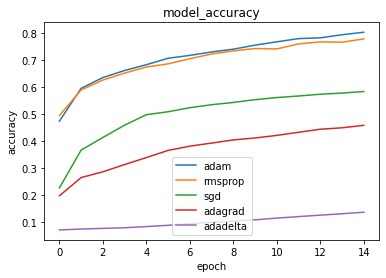

In [29]:
plt.plot(model_history_adam.history['accuracy'])
plt.plot(model_history_rmsprop.history['accuracy'])
plt.plot(model_history_sgd.history['accuracy'])
plt.plot(model_history_adagrad.history['accuracy'])
plt.plot(model_history_adadelta.history['accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['adam', 'rmsprop', 'sgd', 'adagrad', 'adadelta'])
plt.show()

In [36]:
test_loss, test_acc = model.evaluate(X_test,y_test)

94/94 [==============================] - 0s 1ms/step - loss: 0.7544 - accuracy: 0.7394


In [37]:
test_acc

0.7394060492515564